___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


# to display mac columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# !pip install cufflinks

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [ ]:
import pandas as pd
df_male = pd.read_csv('https://query.data.world/s/c52mdq465v77acbuyoxdq4cctjrfye?dws=00000', encoding='latin-1')
df_female = pd.read_csv('https://query.data.world/s/bydb7flh376go6ao5maitsbfzyuukl?dws=00000', encoding='latin-1')


In [ ]:
# check the dataset
display(df_male.shape, df_female.shape)

(4082, 108)

(1986, 108)

In [ ]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [ ]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [ ]:
# Concat the 2 datasets
# since the subjectid column is written differently in the datasets, this prevents concating properly. 
# They will be edited first
df_male.columns.to_list()

In [ ]:
df_female.columns.to_list()

In [ ]:
# Column names >> list >> set and print the different column names in both datasets
print(set(df_male.columns.to_list()) - set(df_female.columns.to_list()))
print(set(df_female.columns.to_list()) - set(df_male.columns.to_list()))


{'subjectid'}
{'SubjectId'}


In [ ]:
df_female.rename(columns = {'SubjectId':'subjectid'}, inplace = True)

In [ ]:
# create a new dataset by merging both and get a deep copy
df0 = pd.concat([df_male, df_female], ignore_index=True)
df= df0.copy()
df.head(1)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand


In [ ]:
df.shape

(6068, 108)

In [ ]:
# drop wieghtkg since we have weightlbs
df.drop("weightkg", inplace=True, axis=1)

In [ ]:
df.shape

(6068, 107)

## Explore Data




columns to be engineered:

- bmi from height weight???


**1. Drop the unnecessary columns**

columns to be dropped:

- subjectid
- SubjectNumericRace
- Ethnicity
- Date
- 'Installation',
- 'Component'
- 'Branch'
- SubjectsBirthLocation: cok daginik, farkli irklarin karisik yasadigi yerler. 100 alti kategori cok fazla. model ogrenemeyecegi icin drop.
- WritingPreference: bilimsel calismalara gore etkisi yok.
- PrimaryMOS


In [ ]:
# primaryMOS check
df.PrimaryMOS.value_counts()

PrimaryMOS
11B     671
88M     320
92A     288
91B     230
68W     222
92Y     211
42A     201
25U     196
31B     191
25B     176
12B     160
13B     139
35D     131
35M     128
74D     126
19D     123
92G     123
92F     119
25Q     113
35F      82
91D      73
25S      66
25L      62
11C      55
25A      53
19K      50
25N      49
12N      39
13D      39
11A      38
13F      38
91C      38
35G      36
92W      34
94F      33
90A      31
91J      30
91A      30
94E      29
89B      28
36B      27
91H      25
92S      24
21B      24
91L      23
35T      21
68A      20
88N      19
27D      19
11Z      19
68E      18
25W      18
92M      18
12C      17
12W      17
56M      17
15T      16
25P      15
13A      15
70B      15
91X      15
68J      15
35N      15
68K      14
35P      14
31E      14
13R      14
14J      14
66H      14
88Z      13
35L      13
88A      13
15W      13
15P      12
35X      12
25C      12
91E      12
13Z      11
351L     11
31A      11
14Z      10
12R      10
14T  

In [ ]:
# check SubjectsBirthLocation
df.SubjectsBirthLocation.value_counts()
# categories are too small and scattered for the model learning. drop

SubjectsBirthLocation
California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Arizona                      84
Missouri                     84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas            

In [ ]:
# check SubjectNumericRace
df.SubjectNumericRace.value_counts()
# similar to DODrace target label. can be dropped

SubjectNumericRace
1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: count, dtype: int64

In [ ]:
# check DODrace- Target
df.DODRace.value_counts()

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [ ]:
# drop the DODrace below 500 bec model can not learn from small groups and can be subject to the misclassification
df = df[df.DODRace<=3]

In [ ]:
df0[df0.SubjectNumericRace <= 3]["SubjectNumericRace"].corr(df0["DODRace"])

0.9756985313158812

In [ ]:
df0[df0["SubjectNumericRace"] >8]["DODRace"].value_counts()

DODRace
1    213
2    171
3    152
4     49
5     30
6     20
8      3
Name: count, dtype: int64

In [ ]:
df0.SubjectNumericRace.corr(df0["DODRace"])

0.01798744618675959

In [ ]:
df0["SubjectNumericRace"].isnull().sum()

0

In [ ]:
# check ethnicity
df.Ethnicity.value_counts()

Ethnicity
Mexican                                               356
Puerto Rican                                          183
Caribbean Islander                                    123
Cherokee                                               60
Dominican                                              32
Colombian                                              17
Cuban                                                  17
Salvadoran                                             16
Arab or Middle Eastern                                 16
Filipino                                               14
Japanese                                               12
Mexican Puerto Rican                                   10
Peruvian                                                9
Honduran                                                9
Panamanian                                              9
Dominican Puerto Rican                                  8
Ecuadorian                                              7
Nica

## ! SubjectNumericRace drop edilmedi

In [ ]:
# drop unnecessary attributes
df.drop(columns=["subjectid","Ethnicity","Date",'Installation','Component','Branch',
                 "SubjectsBirthLocation", "WritingPreference","PrimaryMOS"], axis=1, inplace=True)

In [ ]:
# the only object attribute is Gender and it has only two categories. It will be converted to numerical
df.Gender.value_counts()

Gender
Male      3899
Female    1870
Name: count, dtype: int64

In [ ]:
df.Gender = df.Gender.replace("Male", 0).replace("Female", 1)

In [ ]:
# check updated df
df.shape

(5769, 98)

In [ ]:
df.info()

**Duplicate control**

In [ ]:
# check duplicated values
df.duplicated().sum()

0

**Null Values control**

In [ ]:
# check null values
df.isnull().sum()
# any null values

**main statistical insights**

In [ ]:
# check main statistics and distribution of the data
df.describe().T
# first insight from the mean and std show that there are not many outliers. will be checked with boxplots again.

In [ ]:
# check the correlation of features with DOD race
df.corr()["DODRace"]

In [ ]:
# check the correlation of the features with target throguh a barplot
plt.figure(figsize=(20,25))
ax = df.corr()["DODRace"].drop("DODRace").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

**OUTLIERS CHECK**

In [ ]:
plt.figure(figsize=(30,50))
fig = px.box(df, color="DODRace", color_discrete_map={1:'#FF0000',2:'#00FF00', 3:'#000FF0'})
fig.show()

In [ ]:
def count_outliers(data):
    """
    This function counts the number of outliers in each numeric feature of a given dataset
    using Tukey's method.
    
    Parameters:
    -----------
    data : pandas DataFrame
        The dataset to analyze
    
    Returns:
    --------
    outlier_counts : pandas DataFrame
        A DataFrame containing the count of outliers for each numeric feature
    """
    # Create an empty DataFrame to store the outlier counts
    outlier_counts = pd.DataFrame(columns=['feature', 'count'])
    
    # Loop through each numeric feature in the dataset
    for feature in data.select_dtypes(include=np.number):
        # Calculate the first and third quartiles and the interquartile range
        q1 = data[feature].quantile(0.25)
        q3 = data[feature].quantile(0.75)
        iqr = q3 - q1
        
        # Calculate the lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Count the number of outliers
        num_outliers = len(data[(data[feature] < lower_bound) | (data[feature] > upper_bound)])
        
        # Add the outlier count to the DataFrame
        outlier_counts = outlier_counts.append({'feature': feature, 'count': num_outliers}, ignore_index=True)
    
    # Return the DataFrame of outlier counts
    return outlier_counts

In [ ]:
count_outliers(df)

In [ ]:
help(count_outliers)

**Multicolinearity** Scaling sonrası???

In [ ]:
def color_red(val):
    
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
# pd.DataFrame(df).corr().style.applymap(color_red)

In [ ]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any()

In [ ]:
df.DODRace.value_counts()

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

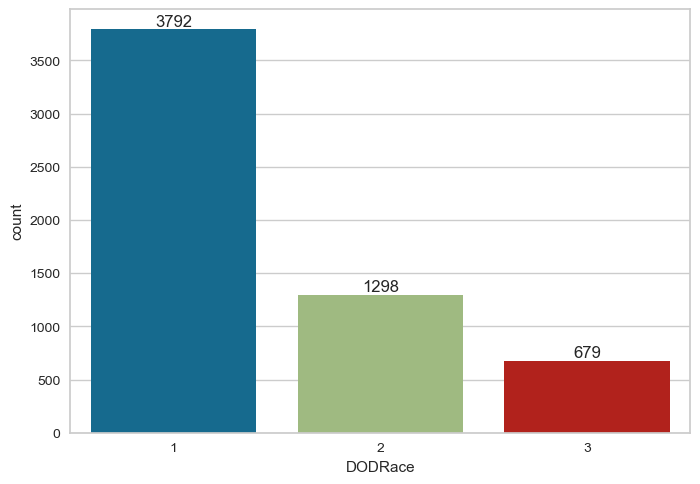

In [ ]:
ax = sns.countplot(x='DODRace', data=df)
ax.bar_label(ax.containers[0]);
# imbalance 

# WITH SUBJECT RACE

**yaplacaklar:**

- SubjectNumericRace >8 olanlardf1["SubjectNumericRace"] <= 3] olanların DODRace ile degiecek
- artik SubjectNumericRace race en buyuk 8. dolayısıyla 3'ten buyuklaeri dusecek. yanşi 
- df1 = df1[df.SubjectNumericRace<=3]

**Buradan itibaren df1 ile calisildi**

In [ ]:
df1 = df.copy()
df2 = df.copy() ## ihtiyat amacli

In [ ]:
df1.SubjectNumericRace.info()

<class 'pandas.core.series.Series'>
Index: 5769 entries, 0 to 6067
Series name: SubjectNumericRace
Non-Null Count  Dtype
--------------  -----
5769 non-null   int64
dtypes: int64(1)
memory usage: 90.1 KB


In [ ]:
df1.SubjectNumericRace.value_counts()

In [ ]:
df1.SubjectNumericRace[df["SubjectNumericRace"] > 3].count()

644

**SubjectNumericRace >8 olanlar df[df.SubjectNumericRace >8] olanların DODRace ile degiecek**

In [ ]:
df1.SubjectNumericRace[df["SubjectNumericRace"] > 8].count()

536

In [ ]:
df1[(df1["SubjectNumericRace"] > 8)].head(10)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Gender,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
10,272,1450,339,218,1353,244,189,412,351,278,523,68,357,337,150,1027,261,879,578,468,377,1527,293,1117,270,1311,839,659,352,37,74,21,300,845,101,265,350,304,589,488,1093,89,212,200,155,578,200,330,71,352,374,1055,685,510,483,502,556,493,79,391,137,445,473,1487,117,435,263,1203,362,144,969,915,580,1840,1780,1464,1108,624,183,844,487,142,918,1775,512,334,994,254,454,1033,174,863,0,351,1,32,70,195
27,247,1469,335,219,1363,224,205,395,330,272,480,75,327,310,140,996,250,896,610,498,370,1550,280,964,224,1316,857,635,370,36,60,25,273,856,94,275,336,281,555,470,1132,84,197,192,155,575,196,337,67,337,395,1073,625,358,394,505,559,501,74,412,122,365,404,1507,115,431,246,1095,362,151,958,875,582,1828,1795,1478,1140,621,172,775,495,115,946,1705,483,323,912,229,424,1070,180,873,0,61,1,36,71,176
36,261,1386,334,193,1282,227,175,361,325,268,440,66,318,275,139,941,238,862,598,493,340,1452,251,951,239,1227,815,600,355,35,58,22,218,765,95,236,346,265,513,470,1124,79,188,183,150,562,193,310,78,315,377,1016,645,351,375,479,526,470,78,396,111,357,389,1372,110,402,261,1013,356,138,882,842,586,1757,1685,1383,1067,637,172,784,459,138,887,1593,458,318,895,225,374,1012,155,789,0,61,1,20,68,150
56,212,1496,347,208,1395,235,208,394,320,258,475,75,327,290,140,897,211,973,625,511,373,1543,256,901,205,1343,911,578,360,36,61,22,230,779,94,282,386,291,516,513,1140,89,208,196,151,568,193,330,64,312,332,1103,650,359,387,521,570,512,69,359,120,368,398,1502,120,453,304,1093,376,142,879,924,647,1922,1783,1474,1157,532,165,827,501,126,984,1587,425,265,750,192,377,1113,177,856,0,28,2,26,71,147
71,218,1384,338,201,1287,234,201,372,349,224,454,73,305,276,131,823,215,922,620,519,330,1460,263,939,230,1279,874,554,345,33,59,19,156,729,100,278,364,282,510,497,1147,84,200,203,154,574,200,324,66,268,314,1068,620,385,399,523,555,504,64,341,133,346,388,1418,119,440,275,1067,359,132,834,885,600,1832,1705,1405,1106,498,149,823,489,125,948,1441,396,252,743,193,345,1062,162,778,0,28,2,28,68,140
79,267,1472,338,263,1362,268,224,431,390,273,520,83,360,318,156,1022,253,957,656,516,436,1551,282,1063,265,1326,915,630,381,38,64,21,210,783,109,297,364,334,584,502,1207,94,230,208,168,628,218,383,80,354,386,1125,680,411,434,524,588,518,69,463,136,411,446,1450,121,438,276,1189,363,144,910,924,605,1894,1799,1472,1165,669,192

In [ ]:
df1["DODRace"].value_counts()

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [ ]:
# df1.loc[df1["SubjectNumericRace"] > 8]

In [ ]:
df1["SubjectNumericRace"].value_counts()

SubjectNumericRace
1        3559
2        1025
3         541
31        159
8         106
51        102
21         60
23         34
28         26
251        20
41         19
18         16
61         15
25         13
38          9
351         9
231         6
42          6
62          6
35          5
235         4
43          3
63          3
218         3
431         2
2351        2
423         2
2518        2
4251        1
238         1
318         1
451         1
4           1
425         1
428         1
651         1
6           1
631         1
358         1
42351       1
Name: count, dtype: int64

In [ ]:
df1.loc[df1["SubjectNumericRace"]>8, "SubjectNumericRace"] = df1["DODRace"]

In [ ]:
df1["SubjectNumericRace"].value_counts()

SubjectNumericRace
1    3772
2    1196
3     693
8     106
4       1
6       1
Name: count, dtype: int64

In [ ]:
df1[df1["SubjectNumericRace"] > 3].count()

abdominalextensiondepthsitting    108
acromialheight                    108
acromionradialelength             108
anklecircumference                108
axillaheight                      108
balloffootcircumference           108
balloffootlength                  108
biacromialbreadth                 108
bicepscircumferenceflexed         108
bicristalbreadth                  108
bideltoidbreadth                  108
bimalleolarbreadth                108
bitragionchinarc                  108
bitragionsubmandibulararc         108
bizygomaticbreadth                108
buttockcircumference              108
buttockdepth                      108
buttockheight                     108
buttockkneelength                 108
buttockpopliteallength            108
calfcircumference                 108
cervicaleheight                   108
chestbreadth                      108
chestcircumference                108
chestdepth                        108
chestheight                       108
crotchheight

In [ ]:
df1.SubjectNumericRace[df1["SubjectNumericRace"] > 3].count()

108

**df1["SubjectNumericRace"] <= 3] degerleri drop edildi**

In [ ]:
df1 = df1[df1['SubjectNumericRace'] <= 3]

In [ ]:
df1.reset_index()

In [ ]:
df1.SubjectNumericRace[df1["SubjectNumericRace"] > 3].count()

0

In [ ]:
df1["SubjectNumericRace"].value_counts()

SubjectNumericRace
1    3772
2    1196
3     693
Name: count, dtype: int64

In [ ]:
df["DODRace"].value_counts()

DODRace
1    3780
2    1204
3     677
Name: count, dtype: int64

In [ ]:
df1.shape

(5661, 98)

In [ ]:
df1.info()

In [ ]:
df.shape ## 108 deger düsüldü

(5769, 98)

In [ ]:
df.info()

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

#### orjinal df df3 e kopyalandi

In [ ]:
df3 = df.copy()

**df, df1'e kopyalandi, bu satirdan itibaren df ile yapilan calismalar df1 deki SubjectNumericRace 'in 8' den büyük degerlerinin DODRace ile degistikten sonra (SubjectNumericRace'in) 3'ten kücük degerlerinin drop edilmis  haliyle calisilacak**

In [ ]:
df = df1.copy()

**split the data**

In [ ]:
X=df.drop(["DODRace"], axis=1)
y=df["DODRace"]

In [ ]:
df.DODRace.value_counts()

DODRace
1    3780
2    1204
3     677
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# stratify=y : the data is imbalanced

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)


In [ ]:
print(y.value_counts(normalize=True))
print()
print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))

DODRace
1    0.667727
2    0.212683
3    0.119590
Name: proportion, dtype: float64

DODRace
1    0.667624
2    0.212677
3    0.119700
Name: proportion, dtype: float64

DODRace
1    0.668138
2    0.212710
3    0.119153
Name: proportion, dtype: float64


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [ ]:
y_pred = pipe_model.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

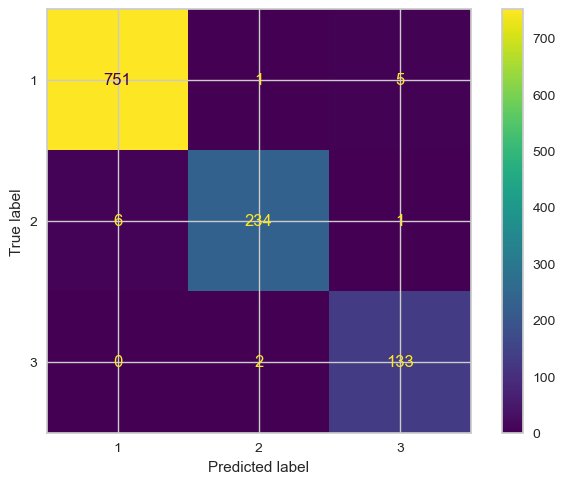

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# genel olarak overfitting yok
# ancak model ozellikle 3. sinif icin cok dusuk performans gosteriyor. recall ve precision degerleri cok dusuk
# CV ile asagida overfitting kontrolü yapilacak
# gridsearch ile bet parameters ile tekrar denenecek

Test_Set
[[751   1   5]
 [  6 234   1]
 [  0   2 133]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       757
           2       0.99      0.97      0.98       241
           3       0.96      0.99      0.97       135

    accuracy                           0.99      1133
   macro avg       0.98      0.98      0.98      1133
weighted avg       0.99      0.99      0.99      1133


Train_Set
[[3014    2    7]
 [   4  957    2]
 [   3    1  538]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3023
           2       1.00      0.99      1.00       963
           3       0.98      0.99      0.99       542

    accuracy                           1.00      4528
   macro avg       0.99      0.99      0.99      4528
weighted avg       1.00      1.00      1.00      4528



Without SubjectNumericRace

Test_Set
[[725  12  21]
 [ 19 232   9]
 [ 72  14  50]]
              precision    recall  f1-score   support

           1       0.89      0.96      0.92       758
           2       0.90      0.89      0.90       260
           3       0.62      0.37      0.46       136

    accuracy                           0.87      1154
   macro avg       0.80      0.74      0.76      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[2924   26   84]
 [  57  961   20]
 [ 268   58  217]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93      3034
           2       0.92      0.93      0.92      1038
           3       0.68      0.40      0.50       543

    accuracy                           0.89      4615
   macro avg       0.83      0.76      0.79      4615
weighted avg       0.88      0.89      0.88      4615


In [ ]:
# CV

from sklearn.model_selection import cross_validate

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.990723
train_accuracy              0.995730
test_precision_weighted     0.990743
train_precision_weighted    0.995745
test_recall_weighted        0.990723
train_recall_weighted       0.995730
test_f1_weighted            0.990697
train_f1_weighted           0.995734
dtype: float64

Without SubjectNumericRace

test_accuracy               0.874973
train_accuracy              0.889948
test_precision_weighted     0.861964
train_precision_weighted    0.879708
test_recall_weighted        0.874973
train_recall_weighted       0.889948
test_f1_weighted            0.863388
train_f1_weighted           0.880241
dtype: float64

In [ ]:
# class prediction

y_pred=pipe_model.predict(X_test)
y_pred_proba = pipe_model.predict_proba(X_test)

test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_1"] = y_pred_proba[:,0]
test_data["pred_proba_2"] = y_pred_proba[:,1]
test_data["pred_proba_3"] = y_pred_proba[:,2]
test_data[test_data.DODRace ==3].sample(10)

### Logistic Model GridsearchCV

In [ ]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=5000))]
 
model = Pipeline(steps=operations)

In [ ]:
model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('logistic', LogisticRegression(max_iter=5000))],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(max_iter=5000),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 5000,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [ ]:
# imabalanced datada en kotu performmans calss 3. bu nedenle class 3 recall'u ana hedefimiz
# gridsearche recall_3 verilir
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_3 = make_scorer(f1_score, labels =[3], average = None)
precision_3 = make_scorer(precision_score, labels =[3], average = None)
recall_3 = make_scorer(recall_score, labels =[3], average = None)

# Cv'de kullanmak üzere her metric icin label:
# gridsearch sadece 1 skora gore optimizasyon yapacagi icin, altta scoringde recall_macro ile belirtecegiz
scoring = {"precision_3":precision_3, "recall_3":recall_3, "f1_3":f1_3}

In [ ]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__solver" : solver}

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# computational costs nedeniyle gridsearch yerine randomizedsearch deneyecegiz
grid_model = GridSearchCV(model, param_grid = param_grid, cv=5, n_jobs=-1, scoring="recall_macro",return_train_score=True) 

In [ ]:
# grid_model = GridSearchCV(model, param_grid = param_grid, cv=5, n_jobs=-1, return_train_score=True) 

In [ ]:
#!pip install scikit-learn-intelex

In [ ]:
# conda install scikit-learn-intelex -c conda-

In [ ]:
# pip install scikit-learn-intelex --progress-bar off >> /tmp/pip_sklearnex.log

In [ ]:
# from sklearnex import patch_sklearn
# patch_sklearn()

In [ ]:
grid_model.fit(X_train,y_train)

In [ ]:
grid_model.best_params_

In [ ]:
2+2

In [ ]:
grid_model.best_estimator_

In [ ]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

In [ ]:
y_pred = grid_model.predict(X_test)
y_pred

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);
# total number of false predictions for sclass 3 has increased. Vanilla performs better

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)
# test scores has decreased

Without SubjectNumericTace

Test_Set
[[724  11  23]
 [ 18 233   9]
 [ 74  14  48]]
              precision    recall  f1-score   support

           1       0.89      0.96      0.92       758
           2       0.90      0.90      0.90       260
           3       0.60      0.35      0.44       136

    accuracy                           0.87      1154
   macro avg       0.80      0.73      0.75      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[2925   24   85]
 [  55  962   21]
 [ 265   58  220]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93      3034
           2       0.92      0.93      0.92      1038
           3       0.67      0.41      0.51       543

    accuracy                           0.89      4615
   macro avg       0.83      0.77      0.79      4615
weighted avg       0.88      0.89      0.88      4615

**ROC (Receiver Operating Curve) and AUC (Area Under Curve)**

In [ ]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

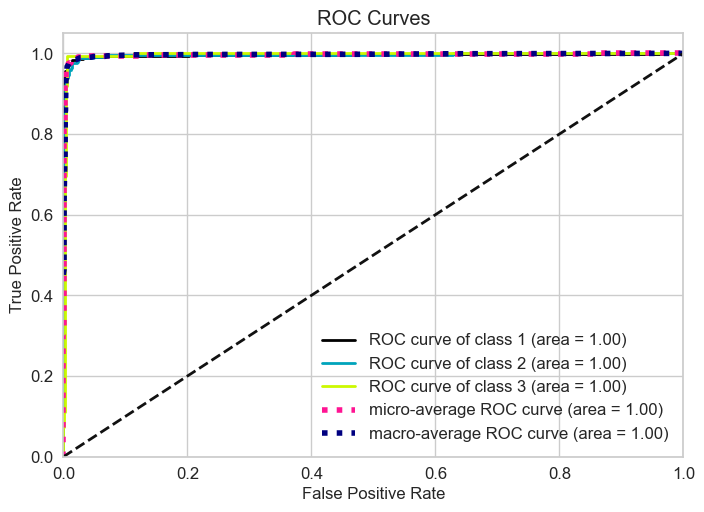

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=19, max_iter=5000))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

# high performance for class 1 and class 2; slightly lower performance for class 3

Without SubjectNumericTace

Result: There is nor overfitting for the log regression model. However, the prediction performance of the model decreases sharply for the class 3. In the same way, ROC curve AUC also decreases significantly for the class 3.

![download.png](attachment:download.png)


## 2. SVC

### Vanilla SVC model 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# scaling and pipeline

operations = [("scaler", StandardScaler()), ("SVC", SVC())]
pipe_model = Pipeline(steps=operations)

In [ ]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# compared to logistic regression, SVC performs worse for all classes.
# overfitting

Test_Set
[[752   0   5]
 [  9 230   2]
 [  3  10 122]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       757
           2       0.96      0.95      0.96       241
           3       0.95      0.90      0.92       135

    accuracy                           0.97      1133
   macro avg       0.96      0.95      0.96      1133
weighted avg       0.97      0.97      0.97      1133


Train_Set
[[3023    0    0]
 [   0  963    0]
 [   0    0  542]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3023
           2       1.00      1.00      1.00       963
           3       1.00      1.00      1.00       542

    accuracy                           1.00      4528
   macro avg       1.00      1.00      1.00      4528
weighted avg       1.00      1.00      1.00      4528



In [ ]:
Test_Set
[[605  16 137]
 [  9 232  19]
 [ 38  11  87]]
              precision    recall  f1-score   support

           1       0.93      0.80      0.86       758
           2       0.90      0.89      0.89       260
           3       0.36      0.64      0.46       136

    accuracy                           0.80      1154
   macro avg       0.73      0.78      0.74      1154
weighted avg       0.85      0.80      0.82      1154


Train_Set
[[2454   56  524]
 [  29  939   70]
 [  96   45  402]]
              precision    recall  f1-score   support

           1       0.95      0.81      0.87      3034
           2       0.90      0.90      0.90      1038
           3       0.40      0.74      0.52       543

    accuracy                           0.82      4615
   macro avg       0.75      0.82      0.77      4615
weighted avg       0.88      0.82      0.84      4615

In [ ]:
# check with cross validation

operations = [("scaler", StandardScaler()), ("SVC", SVC())]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train, 
                        scoring=['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.994258
train_accuracy     0.996516
test_precision          NaN
train_precision         NaN
test_recall             NaN
train_recall            NaN
test_f1                 NaN
train_f1                NaN
dtype: float64

In [ ]:
Without SNR

test_accuracy      0.869338
train_accuracy     0.896039
test_precision          NaN
train_precision         NaN
test_recall             NaN
train_recall            NaN
test_f1                 NaN
train_f1                NaN
dtype: float64

###  SVC Model GridsearchCV

In [ ]:
# define the space for hyperparameters
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear'], 
              'SVC__class_weight': ["balanced", None]}

In [ ]:
# set the operator order including scaler for pipeline and build SVC model by using pipeline
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)

# scores for imbalanced multiclass dataset-for CV
scoring = {
    'weighted_precision': make_scorer(precision_score, average='weighted'),
    'weighted_recall': make_scorer(recall_score, average='weighted'),
    'weighted_f1': make_scorer(f1_score, average='weighted'),
    'macro_f1': make_scorer(f1_score, average='macro')
}

# model
svm_model_grid = GridSearchCV(pipe_model, 
                              param_grid, 
                              scoring="recall_macro",
                              cv=10, 
                              n_jobs=-1,
                              return_train_score=True)

In [ ]:
# fit the train data
svm_model_grid.fit(X_train, y_train)


In [ ]:
# get the best estimators
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC',
                 SVC(C=0.05, class_weight='balanced', kernel='linear',
                     probability=True))])

In [ ]:
# check overfitting
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]
# recall scores

mean_test_score     0.995186
mean_train_score    0.995196
Name: 17, dtype: object

In [ ]:
Without SNR

mean_test_score     0.802627
mean_train_score    0.817736
Name: 33, dtype: object

In [ ]:
# check evaluation metrics and scores
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

# recall has increased significantly for class 3 from 0.18 to 0.64. model can predict 86 of 136 truely. 
# train recall for class 3 is higher than test recall (0.74 to 0.64).
# recall for class 1 decreased sharply for class 1


Test_Set
[[752   0   5]
 [  0 239   2]
 [  0   0 135]]
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       757
           2       1.00      0.99      1.00       241
           3       0.95      1.00      0.97       135

    accuracy                           0.99      1133
   macro avg       0.98      1.00      0.99      1133
weighted avg       0.99      0.99      0.99      1133


Train_Set
[[3015    0    8]
 [   2  957    4]
 [   3    0  539]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3023
           2       1.00      0.99      1.00       963
           3       0.98      0.99      0.99       542

    accuracy                           1.00      4528
   macro avg       0.99      1.00      0.99      4528
weighted avg       1.00      1.00      1.00      4528



In [ ]:
SVM model without gridsearch with SNR

Test_Set
[[752   0   5]
 [  9 230   2]
 [  3  10 122]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       757
           2       0.96      0.95      0.96       241
           3       0.95      0.90      0.92       135

    accuracy                           0.97      1133
   macro avg       0.96      0.95      0.96      1133
weighted avg       0.97      0.97      0.97      1133


Train_Set
[[3023    0    0]
 [   0  963    0]
 [   0    0  542]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3023
           2       1.00      1.00      1.00       963
           3       1.00      1.00      1.00       542

    accuracy                           1.00      4528
   macro avg       1.00      1.00      1.00      4528
weighted avg       1.00      1.00      1.00      4528


In [ ]:
SVM with gridsearch without SNR

Test_Set
[[605  16 137]
 [  9 232  19]
 [ 38  11  87]]
              precision    recall  f1-score   support

           1       0.93      0.80      0.86       758
           2       0.90      0.89      0.89       260
           3       0.36      0.64      0.46       136

    accuracy                           0.80      1154
   macro avg       0.73      0.78      0.74      1154
weighted avg       0.85      0.80      0.82      1154


Train_Set
[[2454   56  524]
 [  29  939   70]
 [  96   45  402]]
              precision    recall  f1-score   support

           1       0.95      0.81      0.87      3034
           2       0.90      0.90      0.90      1038
           3       0.40      0.74      0.52       543

    accuracy                           0.82      4615
   macro avg       0.75      0.82      0.77      4615
weighted avg       0.88      0.82      0.84      4615

In [ ]:
# with gridsearch, we don't need cv again, however if we want to see all metrics, we can implement
operations = [("scaler", StandardScaler()), 
              ("SVC", SVC(C= 0.01, kernel= 'linear', probability=True, 
                                                        class_weight="balanced"))]
# For kernel='linear', the value of gamma does not affect the model, as gamma is only used for non-linear kernels. 
# Therefore, the default value of gamma is not used here.

# rebuild the model with best hyperparameters found during gridsearch
model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=scoring, 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# no overfitting

test_weighted_precision     0.996313
train_weighted_precision    0.996288
test_weighted_recall        0.996245
train_weighted_recall       0.996246
test_weighted_f1            0.996256
train_weighted_f1           0.996256
test_macro_f1               0.993669
train_macro_f1              0.993667
dtype: float64

In [ ]:
without SNR

test_weighted_precision     0.868959
train_weighted_precision    0.875967
test_weighted_recall        0.814522
train_weighted_recall       0.821837
test_weighted_f1            0.832347
train_weighted_f1           0.839208
test_macro_f1               0.755012
train_macro_f1              0.766642
dtype: float64

## 3. RF

### Vanilla RF Model

In [ ]:
# import RF Classifier
from sklearn.ensemble import RandomForestClassifier

# define the operations for pipeline
# tree-based algorithms do not need scaling
# since the data is imbalanced: class_weight="balanced"
operations = [("RF_model", RandomForestClassifier(class_weight="balanced",random_state=101))]

# build pipe model
pipe_model = Pipeline(steps=operations)

# fit the train data
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

**Model Performance**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,\
                            accuracy_score, recall_score, precision_score,\
                            f1_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# as seen the scores in the vanilla RF model for the train data are pretty high; however the model
# performs very badly for the test data. Compared to the log reg and svm, recall scores of class 2 and class 3
# have decreased. For example, for class 3, it can predict only 5 out of 136 correctly.
# model is highly overfitted. It will be checked with cross val to be sure

Test_Set
[[752   0   5]
 [  9 230   2]
 [  3  10 122]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       757
           2       0.96      0.95      0.96       241
           3       0.95      0.90      0.92       135

    accuracy                           0.97      1133
   macro avg       0.96      0.95      0.96      1133
weighted avg       0.97      0.97      0.97      1133


Train_Set
[[3023    0    0]
 [   0  963    0]
 [   0    0  542]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3023
           2       1.00      1.00      1.00       963
           3       1.00      1.00      1.00       542

    accuracy                           1.00      4528
   macro avg       1.00      1.00      1.00      4528
weighted avg       1.00      1.00      1.00      4528



In [ ]:
without SNR

Test_Set
[[747   9   2]
 [ 78 182   0]
 [120  11   5]]
              precision    recall  f1-score   support

           1       0.79      0.99      0.88       758
           2       0.90      0.70      0.79       260
           3       0.71      0.04      0.07       136

    accuracy                           0.81      1154
   macro avg       0.80      0.57      0.58      1154
weighted avg       0.81      0.81      0.76      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615


In [ ]:
# cross validation
operations = [("RF_model", RandomForestClassifier(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=["accuracy", 
                                 "precision_micro",
                                 "recall_micro", 
                                 "f1_micro"], 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# model is highly overfitted.

test_accuracy            0.978578
train_accuracy           1.000000
test_precision_micro     0.978578
train_precision_micro    1.000000
test_recall_micro        0.978578
train_recall_micro       1.000000
test_f1_micro            0.978578
train_f1_micro           1.000000
dtype: float64

In [ ]:
without SNR

test_accuracy            0.8026
train_accuracy           1.0000
test_precision_micro     0.8026
train_precision_micro    1.0000
test_recall_micro        0.8026
train_recall_micro       1.0000
test_f1_micro            0.8026
train_f1_micro           1.0000
dtype: float64

In [ ]:
# Model will be rebuilt by tuning the hyperparameteres to check if the scores can be improved

### RF Model GridsearchCV

Since the data is highly imbalanced and complex (with 98 features), the steps to tune the hyperparameters:

- relatively higher max_depth to allow for complex model to capture the patterns in the data, 
- relatively higher number of trees in the forest (n_estimators) to improve the robustness of the model. 
- relatively higher min_samples_split to prevent overfitting on the minority class.
- class_weight hyperparameter which can help the model to deal with class imbalance is set to 'balanced', 'balanced_subsample', and None to automatically adjust the weights inversely proportional to the class frequencies or sample frequencies respectively. 


In [ ]:
# they will be reset in line with the best estimators results below
param_grid = {'n_estimators': [150,200],   # 200,300,400          
              'max_features': [15, 20,  'sqrt'], # 5,10,15, sqrt
              'max_depth': [10,15], # 5,10,15 # default None takes the model to overfitting. thus, manual values are set
              'min_samples_split': [5,10],
              'min_samples_leaf': [1,5], # 1,5,10
              'class_weight': ['balanced', 'balanced_subsample', None]}

In [ ]:
# values counts for each classes
df.DODRace.value_counts()

DODRace
1    3780
2    1204
3     677
Name: count, dtype: int64

In [ ]:
# how to set the class weights

n_samples = [3792, 1298, 679]
total_samples = sum(n_samples)
class_weight_RF = {i: total_samples / (len(n_samples) * n_samples[i]) for i in range(len(n_samples))}

In [ ]:
class_weight_RF

{0: 0.507120253164557, 1: 1.4815100154083205, 2: 2.8321060382916055}

In [ ]:
without SNR

{0: 0.507120253164557, 1: 1.4815100154083205, 2: 2.8321060382916055}

In [ ]:
# RF grid search for imbalanced multiclass data

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


model = RandomForestClassifier(class_weight=class_weight_RF,
                               random_state=101)
scoring = {
    'weighted_precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'weighted_recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'weighted_f1': make_scorer(f1_score, average='weighted', zero_division=0),
    'macro_f1': make_scorer(f1_score, average='macro', zero_division=0)
}

rf_grid_model = GridSearchCV(model, 
                             param_grid, 
                             scoring=scoring,
                             refit="weighted_recall",
                             n_jobs = -1, 
                             verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [ ]:
rf_grid_model.best_estimator_
# first results
# RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=5,
                       # min_samples_split=5, n_estimators=200, random_state=101)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=20,
                       min_samples_split=5, n_estimators=150, random_state=101)

In [ ]:
rf_grid_model.best_score_

0.9960245386801313

In [ ]:
without SNR
0.8212351029252438

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

# despite the improvement in the scores compared to RF without gridsearch, the model is still highly overfitted and
# performs very poorly for the 3rd class

Test_Set
[[752   0   5]
 [  0 239   2]
 [  0   1 134]]
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       757
           2       1.00      0.99      0.99       241
           3       0.95      0.99      0.97       135

    accuracy                           0.99      1133
   macro avg       0.98      0.99      0.99      1133
weighted avg       0.99      0.99      0.99      1133


Train_Set
[[3019    0    4]
 [   1  962    0]
 [   0    0  542]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3023
           2       1.00      1.00      1.00       963
           3       0.99      1.00      1.00       542

    accuracy                           1.00      4528
   macro avg       1.00      1.00      1.00      4528
weighted avg       1.00      1.00      1.00      4528



In [ ]:
without SNR

Test_Set
[[735  20   3]
 [ 60 196   4]
 [114  14   8]]
              precision    recall  f1-score   support

           1       0.81      0.97      0.88       758
           2       0.85      0.75      0.80       260
           3       0.53      0.06      0.11       136

    accuracy                           0.81      1154
   macro avg       0.73      0.59      0.60      1154
weighted avg       0.79      0.81      0.77      1154


Train_Set
[[3034    0    0]
 [  42  996    0]
 [ 173    7  363]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.97      3034
           2       0.99      0.96      0.98      1038
           3       1.00      0.67      0.80       543

    accuracy                           0.95      4615
   macro avg       0.98      0.88      0.91      4615
weighted avg       0.95      0.95      0.95      4615


In [ ]:
# cross val with best hyperparameter scores and overfitting check
model = RandomForestClassifier(class_weight={1: 0.507120253164557, 2: 1.4815100154083205, 3: 2.8321060382916055}, 
                               # class_weight=class_weight_rf the labels are for class_weight_rf 0,1,2
                               # but cross val asks for 1,2,3 label. thus they are entered manually
                               max_depth=15, 
                               max_features=15,
                               max_samples=0.8, 
                               min_samples_leaf=5, 
                               n_estimators=200,
                               random_state=101)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv=10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]
# highly overfitted

test_weighted_precision     0.993008
train_weighted_precision    0.996714
test_weighted_recall        0.992933
train_weighted_recall       0.996687
test_weighted_f1            0.992911
train_weighted_f1           0.996695
test_macro_f1               0.987242
train_macro_f1              0.994632
dtype: float64

In [ ]:
Without SNR

test_weighted_precision     0.796513
train_weighted_precision    0.976517
test_weighted_recall        0.818196
train_weighted_recall       0.976478
test_weighted_f1            0.797589
train_weighted_f1           0.976464
test_macro_f1               0.663047
train_macro_f1              0.968388
dtype: float64

**ROC Curve and AUC**

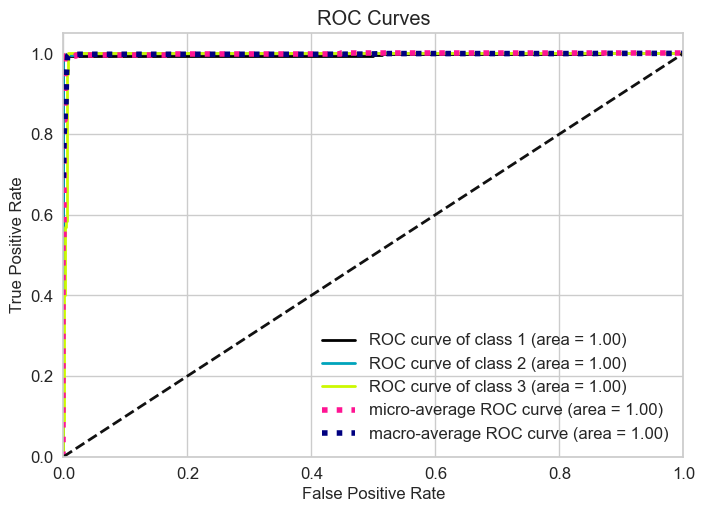

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_proba = rf_grid_model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

# relatively poor results for class 3; model performs well for class 2 and 3

Without SNR
![download.png](attachment:download.png)

**FEATURE IMPORTANCE WITH RF**

In [ ]:
rf_grid_model = RandomForestClassifier(class_weight={1: 0.507120253164557, 2: 1.4815100154083205, 3: 2.8321060382916055}, 
                               max_depth=15, 
                               max_features=15,
                               max_samples=0.8, 
                               min_samples_leaf=5, 
                               n_estimators=200,
                               random_state=101)

rf_grid_model.fit(X_train, y_train)

# feature importance bulduğumuz en iyi hyper parametreleri kullanmamız gerektiğini unutmayalım

RandomForestClassifier(class_weight={1: 0.507120253164557,
                                     2: 1.4815100154083205,
                                     3: 2.8321060382916055},
                       max_depth=15, max_features=15, max_samples=0.8,
                       min_samples_leaf=5, n_estimators=200, random_state=101)

In [ ]:
Without SNR

RandomForestClassifier(class_weight={1: 0.507120253164557,
                                     2: 1.4815100154083205,
                                     3: 2.8321060382916055},
                       max_depth=15, max_features=15, max_samples=0.8,
                       min_samples_leaf=5, n_estimators=200, random_state=101)

In [ ]:
rf_grid_model.feature_importances_

In [ ]:
Without SNR

array([0.00493295, 0.00661655, 0.00580278, 0.00811419, 0.00698262,
       0.00486036, 0.00517863, 0.0051321 , 0.00741646, 0.03237707,
       0.00594677, 0.0045215 , 0.02047304, 0.00818611, 0.0101234 ,
       0.00582511, 0.00662112, 0.0165541 , 0.02933474, 0.03285978,
       0.00647382, 0.00785091, 0.00822556, 0.00706047, 0.00538588,
       0.00651932, 0.0106903 , 0.00702327, 0.00526062, 0.00415161,
       0.01961066, 0.0137585 , 0.03853951, 0.04445912, 0.0046541 ,
       0.00571462, 0.01495151, 0.00601061, 0.00559696, 0.01985917,
       0.00531161, 0.0047632 , 0.00627242, 0.01876863, 0.00549228,
       0.01667045, 0.00814072, 0.0052418 , 0.0289063 , 0.00614372,
       0.00591451, 0.00949406, 0.03207882, 0.0060499 , 0.00533867,
       0.00509157, 0.00453098, 0.00947274, 0.00917979, 0.00626586,
       0.00779042, 0.00695348, 0.00569873, 0.00526231, 0.01470221,
       0.0048291 , 0.01827685, 0.0064998 , 0.00725953, 0.00494069,
       0.05027851, 0.00554898, 0.00472045, 0.00844967, 0.01162369,
       0.00528658, 0.0071535 , 0.00974475, 0.00637118, 0.00660786,
       0.00613823, 0.00638361, 0.01214447, 0.00705333, 0.01288305,
       0.01469098, 0.00705005, 0.0048478 , 0.0077688 , 0.00910836,
       0.00599475, 0.01589682, 0.00556853, 0.00695945, 0.00707608,
       0.00365348])

In [ ]:
# get the feature names from X(independent features) and assign them together with the coefficients
# to a dataframe 

df_f_i = pd.DataFrame(data=rf_grid_model.feature_importances_, 
                      index=X.columns,
                      columns=["Feature Importance"])

# sort the features according to their importance for the Target
df_f_i = df_f_i.sort_values("Feature Importance", ascending=False)
df_f_i


In [ ]:
Without SNR


	Feature Importance
sittingheight	0.050279
eyeheightsitting	0.044459
elbowrestheight	0.038540
buttockpopliteallength	0.032860
bicristalbreadth	0.032377
interpupillarybreadth	0.032079
buttockkneelength	0.029335
heelbreadth	0.028906
bitragionchinarc	0.020473
forearmhandlength	0.019859
earlength	0.019611
handlength	0.018769
radialestylionlength	0.018277
headcircumference	0.016670
buttockheight	0.016554
wristheight	0.015897
forearmcenterofgriplength	0.014952
palmlength	0.014702
waistbreadth	0.014691
earprotrusion	0.013758
waistbacklength	0.012883
trochanterionheight	0.012144
stature	0.011624
crotchheight	0.010690
bizygomaticbreadth	0.010123
thighcircumference	0.009745
iliocristaleheight	0.009494
lateralfemoralepicondyleheight	0.009473
lateralmalleolusheight	0.009180
waistheightomphalion	0.009108
span	0.008450
chestbreadth	0.008226
bitragionsubmandibulararc	0.008186
headlength	0.008141
anklecircumference	0.008114
cervicaleheight	0.007851
mentonsellionlength	0.007790
waistfrontlengthsitting	0.007769
bicepscircumferenceflexed	0.007416
shoulderelbowlength	0.007260
tenthribheight	0.007154
Heightin	0.007076
chestcircumference	0.007060
verticaltrunkcircumferenceusa	0.007053
waistcircumference	0.007050
crotchlengthomphalion	0.007023
axillaheight	0.006983
Age	0.006959
neckcircumference	0.006953
buttockdepth	0.006621
acromialheight	0.006617
thumbtipreach	0.006608
chestheight	0.006519
shouldercircumference	0.006500
calfcircumference	0.006474
tragiontopofhead	0.006384
thighclearance	0.006371
handcircumference	0.006272
lowerthighcircumference	0.006266
hipbreadth	0.006144
tibialheight	0.006138
interscyei	0.006050
forearmcircumferenceflexed	0.006011
wristcircumference	0.005995
bideltoidbreadth	0.005947
hipbreadthsitting	0.005915
buttockcircumference	0.005825
acromionradialelength	0.005803
footlength	0.005715
neckcircumferencebase	0.005699
forearmforearmbreadth	0.005597
Gender	0.005569
sleevelengthspinewrist	0.005549
headbreadth	0.005492
chestdepth	0.005386
interscyeii	0.005339
functionalleglength	0.005312
suprasternaleheight	0.005287
overheadfingertipreachsitting	0.005262
crotchlengthposterioromphalion	0.005261
heelanklecircumference	0.005242
balloffootlength	0.005179
biacromialbreadth	0.005132
kneeheightmidpatella	0.005092
shoulderlength	0.004941
abdominalextensiondepthsitting	0.004933
balloffootcircumference	0.004860
waistdepth	0.004848
poplitealheight	0.004829
handbreadth	0.004763
sleeveoutseam	0.004720
footbreadthhorizontal	0.004654
kneeheightsitting	0.004531
bimalleolarbreadth	0.004521
earbreadth	0.004152
Weightlbs	0.003653

In [ ]:
# visualize the feature importance
plt.figure(figsize=(12,20))
ax =sns.barplot(y = df_f_i.index, 
                x = 'Feature Importance', 
                data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation = 90)
plt.tight_layout()

NameError: name 'df_f_i' is not defined

<Figure size 1200x2000 with 0 Axes>

Without SNR

![image.png](attachment:image.png)

## 4. XGBoost

In [ ]:
X=df.drop(["DODRace"], axis=1)
y=df["DODRace"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [ ]:
import xgboost as xgb

xgb.__version__

'1.7.3'

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]

**ChatGBT**

- Bu hatanın nedeni, XGBClassifier'in beklediği sınıf etiketleri ile y_train veri kümesindeki etiketler arasında bir
- uyumsuzluk olmasıdır. Hata mesajında gösterildiği gibi, model [0, 1, 2] etiketlerini beklerken, eğitim veri kümesindeki
- etiketler [1, 2, 3] olarak belirlenmiştir.

- Bu sorunu çözmek için, etiketleri modelin beklediği sınıf etiketlerine dönüştürmeniz gerekmektedir. Bu, etiketlerinizin 0 tabanlı olduğundan emin olmak için etiketlerinizden 1 çıkartarak yapılabilir. Hem y_train hem de y_test kümesini güncelleyin:

y_train = y_train - 1
y_test = y_test - 1

- Daha sonra, XGBClassifier modelini tekrar eğitmeyi deneyin:

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
--> bunu almadim

- Bu, etiketler arasındaki uyumsuzluğu çözmelidir ve modelin eğitimine devam etmelidir. Lütfen dikkat edin ki bu, etiketlerinizin zaten 0 tabanlı olduğu ve gerçekten 1, 2 ve 3 yerine 0, 1 ve 2 olarak etiketlenmeleri gerektiği varsayımına dayanmaktadır. Eğer etiketlerin 1, 2 ve 3 olması doğruysa, özelleştirilmiş bir hedef fonksiyonu kullanarak modelinizi eğitmeyi düşünebilirsiniz.



**1, 2 ve 3 olması doğru**

- Eğer etiketlerinizin 1, 2 ve 3 olarak kalması doğruysa, XGBClassifier'ın bu etiketlere uyum sağlaması için özel bir hedef fonksiyonu kullanabilirsiniz. Bu durumda, multi:softmax hedef fonksiyonunu kullanarak XGBClassifier'ı yapılandırabilir ve num_class parametresini etiket sayısına göre ayarlayabilirsiniz.

- Öncelikle, XGBClassifier'ı şu şekilde yapılandırın:

xgb = XGBClassifier(objective='multi:softmax', num_class=4)


- Burada, objective parametresi olarak multi:softmax kullanılmış ve num_class parametresi 4 olarak ayarlanmıştır. Bu, XGBClassifier'ın 4 sınıfı (0, 1, 2 ve 3) desteklemesi için modeli yapılandırmalıdır.

- Daha sonra, modeli eğitmeye devam edin:

xgb.fit(X_train, y_train)

- Bu şekilde, modelinizi 1, 2 ve 3 etiketlerini kullanarak eğitebilirsiniz ve bu hedef fonksiyonu, modelinizin bu özel durumu ele almasına yardımcı olacaktır.

- Lütfen dikkat edin ki bu, etiketlerinizin gerçekten 1, 2 ve 3 olarak kalmaları gerektiği varsayımına dayanmaktadır.


In [ ]:
y_train = y_train - 1
y_test = y_test - 1

### Vanilla XGBoost Model

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[752   0   5]
 [  0 239   2]
 [  0   0 135]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       757
           1       1.00      0.99      1.00       241
           2       0.95      1.00      0.97       135

    accuracy                           0.99      1133
   macro avg       0.98      1.00      0.99      1133
weighted avg       0.99      0.99      0.99      1133


Train_Set
[[3023    0    0]
 [   0  963    0]
 [   0    0  542]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3023
           1       1.00      1.00      1.00       963
           2       1.00      1.00      1.00       542

    accuracy                           1.00      4528
   macro avg       1.00      1.00      1.00      4528
weighted avg       1.00      1.00      1.00      4528



In [ ]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model,
                        X_train, 
                        y_train, 
                        scoring=['accuracy', 
                                 'precision',
                                 'recall',
                                 'f1',
                                 'roc_auc'],
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# fit fonksiyonu içerisinde tanımladığımız parametreyi CV içinde fit_params parametresinde belirtmemiz gerekiyor.

test_accuracy      0.996245
train_accuracy     1.000000
test_precision          NaN
train_precision         NaN
test_recall             NaN
train_recall            NaN
test_f1                 NaN
train_f1                NaN
test_roc_auc            NaN
train_roc_auc           NaN
dtype: float64

### XGBoost Model GridsearchCV

In [ ]:
param_grid = {"n_estimators":[50, 100, 200],
              'max_depth':[3,4,5], 
              "learning_rate": [0.1, 0.2],
              "subsample":[0.5, 0.8, 1], 
              "colsample_bytree":[0.5,0.7, 1]}

In [ ]:
xgb_model = XGBClassifier(random_state=42) # default random_state=42

In [ ]:
xgb_grid = GridSearchCV(xgb_model,
                        param_grid, 
                        scoring="f1",
                        verbose=2,
                        n_jobs=-1,
                        return_train_score=True)

xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.2], 'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.8, 1]},
             return_train_score=True, scoring='f1', verbose=2)

In [ ]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 0.5}

In [ ]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
pd.DataFrame(xgb_grid.cv_results_).loc[xgb_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     NaN
mean_train_score    NaN
Name: 0, dtype: object

In [ ]:
Hata, hedef değerlerinizin çok sınıflı olduğu, ancak f1_score, recall_score ve roc_auc_score gibi metriklerin 
varsayılan olarak ikili sınıflandırma için yapılandırıldığından kaynaklanmaktadır. Bu durumu düzeltmek için,
metriklerinizi çok sınıflı sınıflandırma durumunu ele alacak şekilde güncellemeniz gerekmektedir.

f1_score ve recall_score için average parametresini "micro", "macro" veya "weighted" olarak belirleyebilirsiniz. 
"micro" ölçümü, tüm sınıflar için toplam doğru tahminlerin oranını hesaplar. "macro" ölçümü, sınıf başına F1 puanının 
ortalamasını alır ve sınıf dengesizliği göz ardı edilir. "weighted" ölçümü, sınıf başına F1 puanlarının ortalamasını alır 
ve sınıf dengesizliğini dikkate alır.

Ayrıca, roc_auc_score için çok sınıflı durumu ele alacak şekilde güncellemeniz gerekmektedir. roc_auc_score için average 
ve multi_class parametrelerini ayarlayabilirsiniz.



# y_pred = xgb_grid.predict(X_test)
# y_pred_proba = xgb_grid.predict_proba(X_test)

# xgb_f1 = f1_score(y_test, y_pred)
# xgb_recall = recall_score(y_test, y_pred)
# xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

# eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.metrics import f1_score, recall_score, roc_auc_score

y_pred = xgb_grid.predict(X_test)
y_pred_proba = xgb_grid.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred, average='weighted') # veya 'micro' veya 'macro'
xgb_recall = recall_score(y_test, y_pred, average='weighted') # veya 'micro' veya 'macro'
xgb_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)


Test_Set
[[752   0   5]
 [  0 239   2]
 [  0   1 134]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       757
           1       1.00      0.99      0.99       241
           2       0.95      0.99      0.97       135

    accuracy                           0.99      1133
   macro avg       0.98      0.99      0.99      1133
weighted avg       0.99      0.99      0.99      1133


Train_Set
[[3015    0    8]
 [   2  957    4]
 [   3    0  539]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3023
           1       1.00      0.99      1.00       963
           2       0.98      0.99      0.99       542

    accuracy                           1.00      4528
   macro avg       0.99      1.00      0.99      4528
weighted avg       1.00      1.00      1.00      4528



In [ ]:
from sklearn.metrics import f1_score, recall_score, roc_auc_score

y_pred = xgb_grid.predict(X_test)
y_pred_proba = xgb_grid.predict_proba(X_test)

averages = ['weighted', 'micro', 'macro']

for avg in averages:
    xgb_f1 = f1_score(y_test, y_pred, average=avg)
    xgb_recall = recall_score(y_test, y_pred, average=avg)
    xgb_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average=avg)

    print(f"Results for {avg} average:")
    print(f"F1 Score: {xgb_f1}")
    print(f"Recall: {xgb_recall}")
    print(f"AUC: {xgb_auc}")
    print("\n")

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)


Results for weighted average:
F1 Score: 0.9930057849841805
Recall: 0.9929390997352162
AUC: 0.9985037179564337


Results for micro average:
F1 Score: 0.9929390997352163
Recall: 0.9929390997352162
AUC: 0.9994305474301018


Results for macro average:
F1 Score: 0.9871546779663297
Recall: 0.992562939196937
AUC: 0.998263912540604


Test_Set
[[752   0   5]
 [  0 239   2]
 [  0   1 134]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       757
           1       1.00      0.99      0.99       241
           2       0.95      0.99      0.97       135

    accuracy                           0.99      1133
   macro avg       0.98      0.99      0.99      1133
weighted avg       0.99      0.99      0.99      1133


Train_Set
[[3015    0    8]
 [   2  957    4]
 [   3    0  539]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3023
           1       1.00      0.99      1.00       963
       

---
---

(**weighted, micro and macro**)<https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f>


- Çok sınıflı sınıflandırma problemlerinde, performans metriklerini hesaplamak için kullanılan average parametresi, farklı yöntemlerle ortalama almayı ifade eder: "weighted", "micro" ve "macro". Bu yöntemler, sınıfların dengesiz olduğu durumlarda önem kazanır ve model performansını değerlendirmenin farklı yönlerini vurgular.

**Weighted:**
- "Weighted" yöntemi, sınıf başına metrik değerlerinin, sınıf frekanslarına göre ağırlıklı ortalamasını alır. Bu yöntem, sınıf dengesizliğini dikkate alarak, daha büyük sınıfların metrik üzerinde daha fazla etkisi olmasını sağlar. Bu nedenle, dengesiz veri kümesi durumlarında daha iyi bir performans göstergesi olarak kabul edilir.

**Micro:**
- "Micro" yöntemi, tüm sınıflar için toplam doğru tahminlerin oranını hesaplar. Bu yöntemde, her sınıfın doğru tahmin sayısı toplanır ve toplam tahmin sayısına bölünerek metrik değeri hesaplanır. "Micro" yöntemi, sınıflar arasında metriklerin eşit ağırlıklandırılmasını sağlar ve tüm sınıfların performansını tek bir değerde birleştirir.

**Macro:**
- "Macro" yöntemi, sınıf başına metrik değerlerinin basit ortalamasını alır. Bu yöntem, her sınıfın eşit ağırlıkta olduğu varsayımıyla çalışır ve sınıf dengesizliğini göz ardı eder. "Macro" yöntemi, her sınıfın model performansına eşit önem vermek istediğinizde kullanılabilir, ancak dengesiz veri kümelerinde yanıltıcı olabilir.

- Her bir yöntem, model performansını değerlendirmenin farklı yönlerini vurguladığından, hangi yöntemin kullanılacağına karar verirken, problem bağlamı ve iş hedefleri göz önünde bulundurulmalıdır.

## Feature importances

In [ ]:
model = XGBClassifier(n_estimators=50,
                      colsample_bytree=0.5,
                      subsample=0.5,
                      learning_rate=0.1,
                      max_depth= 3)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns,
                     data=model.feature_importances_,
                     columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance", ascending=False)
xgb_imp_feats

In [ ]:
ax = sns.barplot(data=xgb_imp_feats, 
                 x=xgb_imp_feats.index,
                 y='xgb_importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Feature importance comparison

In [ ]:
RocCurveDisplay.from_estimator(xgb_grid, X_test, y_test);

ValueError: Expected 'estimator' to be a binary classifier, but got GridSearchCV fit on multiclass (3 classes) data

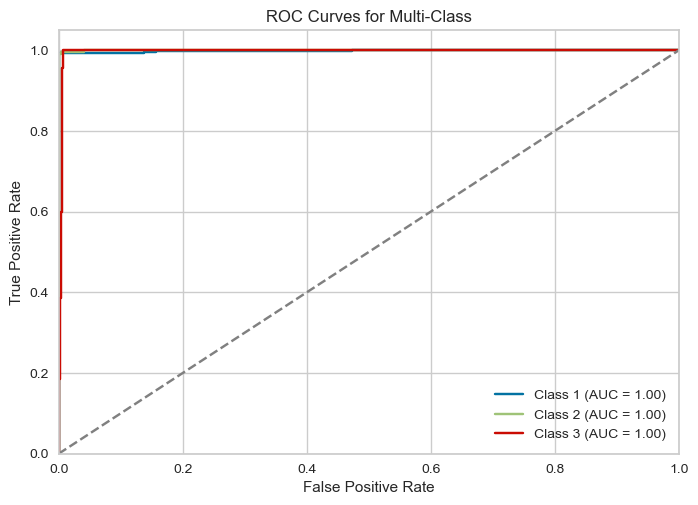

In [ ]:
# Çok sınıflı sınıflandırma problemleri için ROC eğrisini çizmek, ikili sınıflandırma problemleri için 
# kullanılan yöntemden biraz farklıdır. ROC eğrisi, temel olarak ikili sınıflandırma için tasarlanmıştır. 
# Ancak, çok sınıflı problemlerde ROC eğrisini, her sınıfı pozitif sınıf ve diğer sınıfları negatif sınıf olarak 
# kabul ederek çizebilirsiniz. Bu, "one-vs-rest" yaklaşımı olarak bilinir.

# Aşağıda, çok sınıflı bir probleme uygun hale getirilmiş ROC eğrisi çizimi için kodu bulabilirsiniz:


import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize

n_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_proba = xgb_grid.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig, ax = plt.subplots()
for i in range(n_classes):
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i], estimator_name=f"Class {i+1}").plot(ax=ax)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class')
plt.legend(loc="lower right")
plt.show()


# Bu kod, veri kümenizdeki her sınıf için ayrı bir ROC eğrisi çizecektir. Bu, modelinizin sınıflar arasındaki 
# performansını görselleştirmenize yardımcı olur.

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
# !pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

In [ ]:
df.DODRace.value_counts()

**1) SVC OVERSAMPLING**

In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [ ]:
# create the SMOTE object
smote = SMOTE(random_state=42)

# resample the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# find the best hyperparameters with gridsearch

param_grid = {'SVC__C': [0.001, 0.05, 0.01],
              'SVC__gamma': ["scale", "auto", 0.2],
              'SVC__kernel': ['rbf', 'linear'], 
              'SVC__class_weight': ["balanced", None]}

In [ ]:
from sklearn.metrics import balanced_accuracy_score

In [ ]:
# set the operator order including scaler for pipeline and build SVC model by using pipeline
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)

# scores for imbalanced multiclass dataset-for CV
scoring = {
    'weighted_precision': make_scorer(precision_score, average='weighted'),
    'weighted_recall': make_scorer(recall_score, average='weighted'),
    'weighted_f1': make_scorer(f1_score, average='weighted'),
    'macro_f1': make_scorer(f1_score, average='macro'),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}

# Perform grid search
SMOTE_svm = GridSearchCV(pipe_model, 
                          param_grid, 
                          scoring=scoring,
                          cv=10, 
                         refit='macro_f1',
                          n_jobs=-1,
                          return_train_score=True)

In [ ]:
# Fit the model on the balanced dataset
SMOTE_svm.fit(X_train_resampled, y_train_resampled)

In [ ]:
# get the best estimators
SMOTE_svm.best_estimator_

In [ ]:
# check overfitting
pd.DataFrame(SMOTE_svm.cv_results_).loc[SMOTE_svm.best_index_, ["mean_test_score", "mean_train_score"]]


In [ ]:
# check evaluation metrics and scores
eval_metric(SMOTE_svm, X_train_resampled, y_train_resampled, X_test, y_test)

In [ ]:
# with gridsearch, we don't need cv again, however if we want to see all metrics, we can implement
operations = [("scaler", StandardScaler()), 
              ("SVC", SVC(C= 0.01, kernel= 'linear', probability=True, 
                                                        class_weight="balanced"))]

In [ ]:

# rebuild the model with best hyperparameters found during gridsearch
model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=scoring, 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___